In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.stats as sp
from sklearn.utils import resample
import os
import cv2
import random
import pickle

### Functions

In [69]:
def create_10s_data(measure):
    """
    measure: column title in string form
    """
    base = []
    active = []
    recovery = []
    cwd = os.getcwd()
    categories = ['bucket','igloo']
    
    for category in categories:
        path = os.path.join(cwd, category)
        class_num = categories.index(category)
        for df in os.listdir(path):
            if df[-3:] == 'csv':
                dat = pd.read_csv(os.path.join(path,df))
                base.append([np.array(dat.loc[dat['segment']==0,measure][64:76]),class_num])
                active.append([np.array(dat.loc[dat['segment']==1,measure][64:76]),class_num])
                recovery.append([np.array(dat.loc[dat['segment']==2,measure][64:76]),class_num])
    
    base_b = []
    active_b = []
    recovery_b = []
    base_i = []
    active_i = []
    recovery_i = []
    
    for features, label in base:
        if label == 0:
            base_b = np.concatenate((base_b, features), axis=None)
        elif label == 1:
            base_i = np.concatenate((base_i, features), axis=None)

    for features, label in active:
        if label == 0:
            active_b = np.concatenate((active_b, features), axis=None)
        elif label == 1:
            active_i = np.concatenate((active_i, features), axis=None)

    for features, label in recovery:
        if label == 0:
            recovery_b = np.concatenate((recovery_b, features), axis=None)
        elif label == 1:
            recovery_i = np.concatenate((recovery_i, features), axis=None)

    bucket = [round(base_b.mean(),2),round(active_b.mean(),2),round(recovery_b.mean(),2)]
    bucket_err = [round(sp.stats.sem(base_b, axis=None, ddof=0),2),
                  round(sp.stats.sem(active_b, axis=None, ddof=0),2),
                  round(sp.stats.sem(recovery_b, axis=None, ddof=0),2)]
    igloo = [round(base_i.mean(),2),round(active_i.mean(),2),round(recovery_i.mean(),2)]
    igloo_err = [round(sp.stats.sem(base_i, axis=None, ddof=0),2),
                  round(sp.stats.sem(active_i, axis=None, ddof=0),2),
                  round(sp.stats.sem(recovery_i, axis=None, ddof=0),2)]
    
    test = {'bucket_mean':bucket,
   'bucket_stderr':bucket_err,
   'igloo_mean':igloo,
   'igloo_stderr':igloo_err}

    output = pd.DataFrame(test)
    output.index=['before','during','after']
    print(output)
    
    x = [0,1,2]
    fname = measure+'10s'
    plt.figure()
    plt.errorbar(x,bucket,bucket_err,label='bucket')
    plt.errorbar(x,igloo,igloo_err,label='igloo')
    plt.ylim([20, 160])
    plt.ylabel(measure)
    plt.legend()
    plt.title('10s average during experiment')
    plt.savefig(fname+'.png')
    plt.show()
    plt.close()
    

    
    
def create_training_data(measure):
    """
    measure: column title in string form
    """
    base = []
    active = []
    recovery = []
    cwd = os.getcwd()
    categories = ['bucket','igloo']
    
    for category in categories:
        path = os.path.join(cwd, category)
        class_num = categories.index(category)
        for df in os.listdir(path):
            if df[-3:] == 'csv':
                dat = pd.read_csv(os.path.join(path,df))
                base.append([np.array(dat.loc[dat['segment']==0,measure]),class_num])
                active.append([np.array(dat.loc[dat['segment']==1,measure]),class_num])
                recovery.append([np.array(dat.loc[dat['segment']==2,measure]),class_num]) 
    
    base_b = []
    active_b = []
    recovery_b = []
    base_i = []
    active_i = []
    recovery_i = []
    
    for features, label in base:
        if label == 0:
            base_b = np.concatenate((base_b, features), axis=None)
        elif label == 1:
            base_i = np.concatenate((base_i, features), axis=None)

    for features, label in active:
        if label == 0:
            active_b = np.concatenate((active_b, features), axis=None)
        elif label == 1:
            active_i = np.concatenate((active_i, features), axis=None)

    for features, label in recovery:
        if label == 0:
            recovery_b = np.concatenate((recovery_b, features), axis=None)
        elif label == 1:
            recovery_i = np.concatenate((recovery_i, features), axis=None)

    bucket = [round(base_b.mean(),2),round(active_b.mean(),2),round(recovery_b.mean(),2)]
    bucket_err = [round(sp.stats.sem(base_b, axis=None, ddof=0),2),
                  round(sp.stats.sem(active_b, axis=None, ddof=0),2),
                  round(sp.stats.sem(recovery_b, axis=None, ddof=0),2)]
    igloo = [round(base_i.mean(),2),round(active_i.mean(),2),round(recovery_i.mean(),2)]
    igloo_err = [round(sp.stats.sem(base_i, axis=None, ddof=0),2),
                  round(sp.stats.sem(active_i, axis=None, ddof=0),2),
                  round(sp.stats.sem(recovery_i, axis=None, ddof=0),2)]
    
    test = {'bucket_mean':bucket,
       'bucket_stderr':bucket_err,
       'igloo_mean':igloo,
       'igloo_stderr':igloo_err}

    output = pd.DataFrame(test)
    output.index=['before','during','after']
    print(output)
    
    x = [0,1,2]
    fname = measure+'avg' 
        
    plt.errorbar(x,bucket,bucket_err,label='bucket')
    plt.errorbar(x,igloo,igloo_err,label='igloo')
    plt.ylim([20, 160])
    plt.ylabel(measure)
    plt.legend()
    plt.title('Average Change during experiment')
    plt.savefig(fname+'.png')
    plt.show()
    plt.close()

    
def long_plot(measure,pt_id):
    """
    cat: igloo/bucket in string form
    measure: column title in string form
    pt_id: patient id in string form
    """
    
    cwd = os.getcwd()
    cat = ['bucket','igloo']
    
    for i in cat:
        path = os.path.join(cwd, i)
        file = os.path.join(path,pt_id+'.csv')
        dat = pd.read_csv(file)
        plt.plot(np.array(dat[measure]),label=i)

    
    plt.ylabel(measure)
    plt.ylim([20, 160])
    plt.legend()
    plt.title(measure+' during experiment')
    fname = measure+'_long.png' 
    plt.savefig(fname)
    plt.show()
    plt.close()
    
    
    


    

### Application

        bucket_mean  bucket_stderr  igloo_mean  igloo_stderr
before        67.28           0.31       70.33          0.35
during        65.78           0.30       79.41          0.37
after         67.81           0.48       71.43          0.63


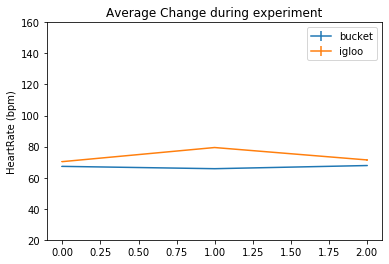

        bucket_mean  bucket_stderr  igloo_mean  igloo_stderr
before        63.75           0.59       68.92          0.65
during        63.79           0.25       84.42          4.65
after         64.77           0.19       68.38          0.41


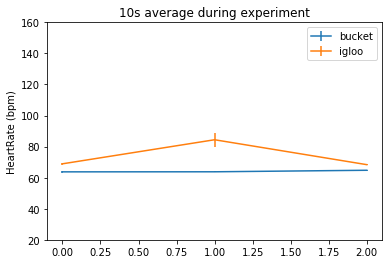

        bucket_mean  bucket_stderr  igloo_mean  igloo_stderr
before        80.73           0.65       82.51          0.28
during        80.88           0.91       83.62          0.23
after         96.78           1.41       89.72          0.32


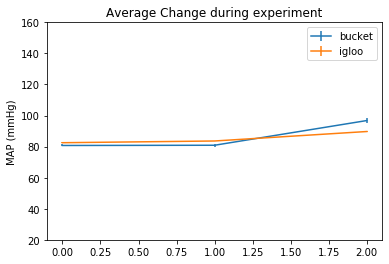

        bucket_mean  bucket_stderr  igloo_mean  igloo_stderr
before        79.08           2.38       80.67          0.94
during        75.08           1.06       87.88          0.76
after        107.00           2.81       87.62          0.30


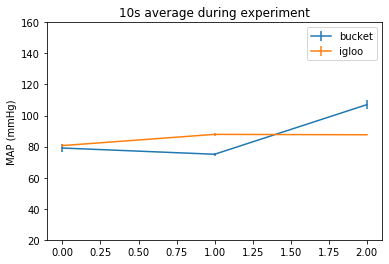

In [70]:
create_training_data('HeartRate (bpm)')
create_10s_data('HeartRate (bpm)')
create_training_data('MAP (mmHg)')
create_10s_data('MAP (mmHg)')

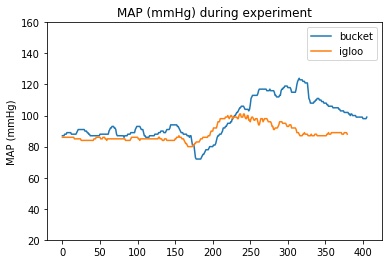

In [66]:
# pt_id = input("input patient ID: ")
long_plot('MAP (mmHg)', '01-100007')